In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 34.6 MB/s 
     |████████████████████████████████| 957 kB 71.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
telco = pd.read_csv('Churn.csv')

## ***Exploring feature distributions***

Visualize the distributions of the following features using seaborn's distribution plot:

```
'Day_Mins'
'Eve_Mins'
'Night_Mins'
'Intl_Mins'
```

To create a feature's distribution plot, pass it in as an argument to **`sns.distplot()`**. The Telco dataset is available to you as a DataFrame called `telco`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


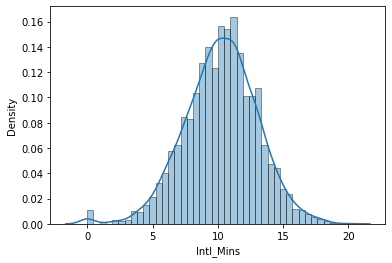

In [ ]:
telco = pd.read_csv('Churn.csv')

# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'], hist_kws={'edgecolor':'k'})

# Display the plot
plt.show()

## ***Customer service calls and churn***

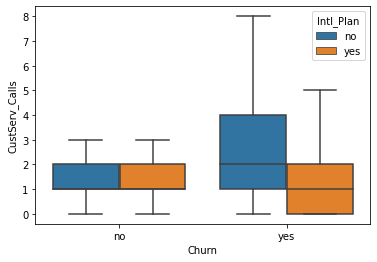

In [ ]:
# Add "Intl_Plan" as a third variable
# sym='' คือไม่เอา outliers
sns.boxplot(x='Churn', y='CustServ_Calls',  data=telco, sym="",  hue='Intl_Plan')

# Display the plot
plt.show()

It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

## ***Encoding binary features***

In [ ]:
 # Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0, 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no': 0, 'yes': 1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


## ***One hot encoding***

In [ ]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   PA  RI  SC  SD  TN  TX 

Notice that this creates an entirely new DataFrame. Once you merge this back into the original `telco` DataFrame, you can begin using these state features in your models. Do note, however, that we now have many more features in our dataset, so we should consider dropping any that are unnecessary.

## ***Feature scaling***



In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())



```
          Intl_Calls    Night_Mins
    count  3.333000e+03  3.333000e+03
    mean  -8.527366e-18  7.887813e-17
    std    1.000150e+00  1.000150e+00
    min   -1.820289e+00 -3.513648e+00
    25%   -6.011951e-01 -6.698545e-01
    50%   -1.948306e-01  6.485803e-03
    75%    6.178983e-01  6.808485e-01
    max    6.307001e+00  3.839081e+00
```
 Both features are now on the same scale. In practice, you'll need to carefully ensure this is the case for all features of interest.

## ***Predicting whether a new customer will churn***
 


```
telco = 

      Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  ...  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge
0                 91             23     232.4     186.0       190.5  ...       15.81          128          8.57           3         3.32
1                 90             27     156.7     236.5       123.2  ...       20.10          111          5.54           6         3.40
2                 63              0     132.9      67.0       160.4  ...        5.70          121          7.22           2         2.67
3                 24              0     156.2      90.0       205.1  ...        7.65          116          9.23           5         1.97
4                108             25     170.7     109.9       165.7  ...        9.34           99          7.46           1         2.35
5                117              0     102.8     206.7       299.0  ...       17.57          105         13.46           7         2.73
6                 42              0     180.7     174.6       165.3  ...       14.84          114          7.44           6         3.24
7                160              0     234.9     270.8       219.3  ...       23.02          101          9.87           2         3.75
8                 70              0     208.7     275.5       182.5  ...       23.42          122          8.21           3         2.16
9                130              0     207.1     200.1       194.2  ...       17.01          100          8.74           2         3.35
10               110              0     192.6     178.9       214.6  ...       15.21           74          9.66           4         2.54
11               163              0     223.0     227.0       188.3  ...       19.30          125          8.47           5         2.38
12                75              0     209.4     211.5       291.2  ...       17.98          123         13.10           4         1.94
13               132              0     206.2     211.2       196.2  ...       17.95          122          8.83           6         2.75
14               101              0     183.9     255.9       275.0  ...       21.75          145         12.38          11         2.92
15                 7              0     206.7     281.1       158.5  ...       23.89           77          7.13           5         2.97
16                83              0     227.9     207.5       211.7  ...       17.64          100          9.53           5         3.27
17               113             23     205.0     152.0       158.6  ...       12.92           59          7.14           5         2.75
18               109              0     217.0     207.0       268.0  ...       17.60          106         12.06           4         2.21
19               122             30     230.1     287.6       177.1  ...       24.45           85          7.97           3         1.86
20               145              0     245.8     286.7       240.7  ...       24.37          115         10.83          13         2.43
21                59              0     189.7     115.9       220.6  ...        9.85          115          9.93           4         2.00
22                81              0     154.5     216.2       229.8  ...       18.38           82         10.34           3         3.70
23               119             22     172.1     223.6       150.0  ...       19.01           94          6.75          20         3.75
24               156              0     174.5     197.4       238.5  ...       16.78           86         10.73           2         2.86
25               120              0     179.9     170.0       190.6  ...       14.45           89          8.58           2         3.73
26               132              0     163.2     167.6        87.5  ...       14.25           90          3.94          10         1.67
27               158              0     175.9     188.3       188.3  ...       16.01           98          8.47           6         2.97
28               114             34     154.4     221.4       208.5  ...       18.82          103          9.38           5         2.78
29               102              0     233.8     221.6       146.9  ...       18.84          106          6.61           3         3.46
...              ...            ...       ...       ...         ...  ...         ...          ...           ...         ...          ...
2636              67              0     120.9     235.0        95.1  ...       19.98          130          4.28          11         3.08
2637             140              0     173.2     196.8       209.3  ...       16.73          128          9.42           5         3.02
2638              54             33     161.8     273.0       153.9  ...       23.21           76          6.93           4         3.70
2639             128             32     223.5     188.8       154.9  ...       16.05          101          6.97           2         2.54
2640              94              0     137.5     203.2       150.0  ...       17.27          131          6.75           2         3.62
2641             131             34     156.6      71.0       261.7  ...        6.04          120         11.78          10         3.62
2642             161              0     332.9     317.8       160.6  ...       27.01          128          7.23           9         1.46
2643             119             16     147.2     160.1       184.0  ...       13.61          120          8.28           2         2.08
2644              62              0     281.0     160.6        77.9  ...       13.65           74          3.51           0         0.00
2645              23              0     190.2     166.4       219.8  ...       14.14           73          9.89           4         4.05
2646              56              0     137.2     165.9       182.3  ...       14.10           72          8.20           4         3.86
2647             145              0     229.6     138.1       250.8  ...       11.74          109         11.29           3         0.89
2648             117              0     214.4     138.0       148.7  ...       11.73          102          6.69           1         2.67
2649             122              0     136.7     243.1       188.9  ...       20.66          110          8.50           4         2.32
2650              95             41     136.8     200.8       133.7  ...       17.07           67          6.02           9         2.78
2651              98              0     169.9     138.3       142.6  ...       11.76          105          6.42           7         2.30
2652             106              0     165.3     210.0       187.2  ...       17.85           93          8.42           3         2.30
2653              53              0     145.1     233.7       208.7  ...       19.86           95          9.39           5         2.13
2654             112              0     272.5     226.1       159.1  ...       19.22           94          7.16           5         4.43
2655             167              0     131.6     211.3       168.3  ...       17.96           97          7.57           4         3.00
2656              22              0     110.3     166.5       202.3  ...       14.15           96          9.10           5         2.57
2657              99              0     190.4     158.1       271.5  ...       13.44           92         12.22           4         3.02
2658              67              0     152.5     252.4       185.4  ...       21.45          104          8.34           3         1.32
2659             161             38     240.4     201.8       206.1  ...       17.15          112          9.27           6         4.35
2660              50             35     192.6     135.2       216.2  ...       11.49          101          9.73           2         2.13
2661              48              0     197.7     136.7       244.4  ...       11.62           81         11.00           5         3.56
2662              89              0      89.7     179.8       145.7  ...       15.28          120          6.56           4         2.57
2663             169              0     235.7     136.9       220.9  ...       11.64           97          9.94          10         3.59
2664              93             19     136.8     179.5        71.1  ...       15.26           95          3.20           3         3.38
2665             129              0      98.0     240.7       254.8  ...       20.46          123         11.47           4         2.84

[2666 rows x 18 columns]

telco['Churn'] = 

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      1
24      0
25      1
26      0
27      0
28      0
29      0
       ..
2636    0
2637    0
2638    0
2639    1
2640    0
2641    0
2642    1
2643    1
2644    0
2645    0
2646    0
2647    0
2648    0
2649    0
2650    1
2651    0
2652    0
2653    0
2654    1
2655    1
2656    0
2657    0
2658    0
2659    0
2660    0
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

new_customer = 

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  ...  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge
0              91             23     232.4     186.0       190.5  ...       15.81          128          8.57           3         3.32

[1 rows x 17 columns]
```




In [ ]:
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',     'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(telco[features], telco['Churn'])


# Predict the label of new_customer
print(clf.predict(new_customer))


## ***Creating training and test sets***

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop(columns='Churn')

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## ***Computing accuracy***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

# **Imbalanced classes**

```
telco['Churn'].value_counts()

no 2850
yes 483
Name: Churn, dtype: int64
```

* Accuracy not a very useful metric

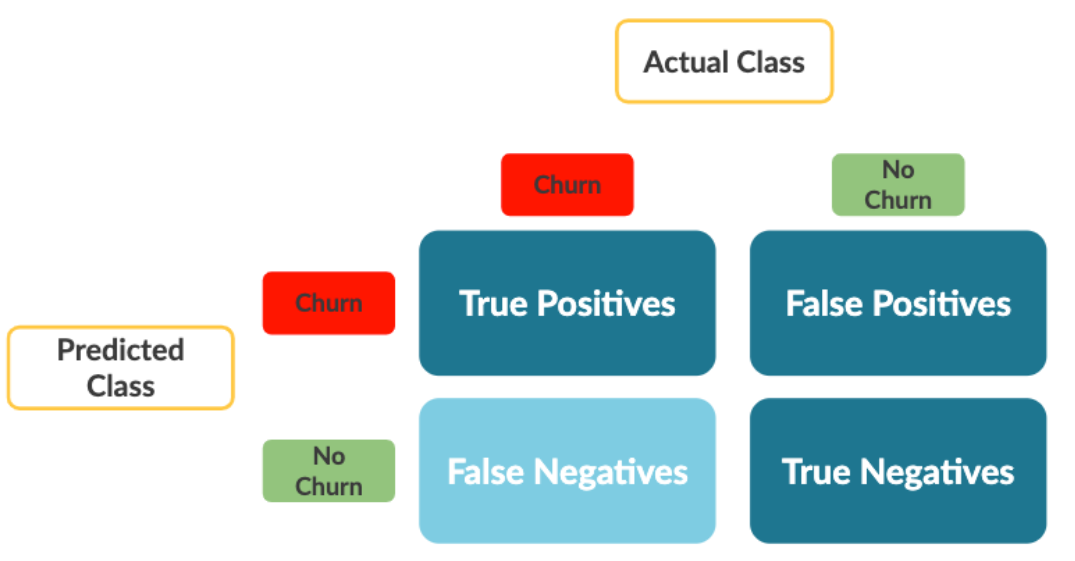

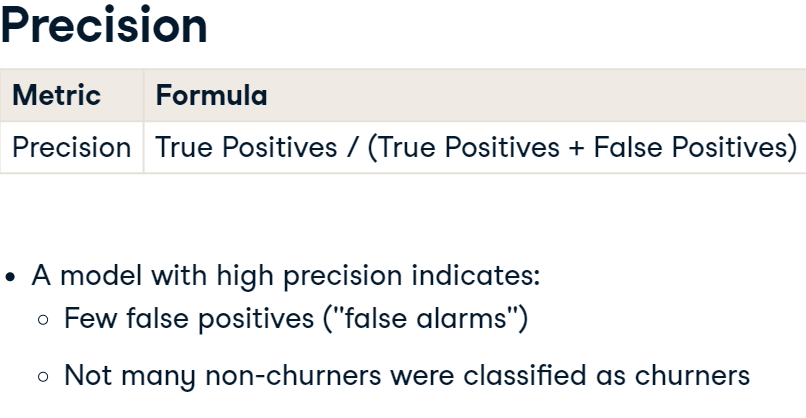

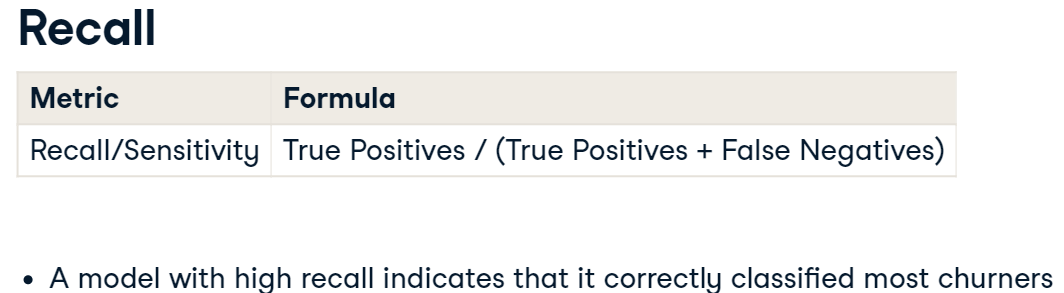

## ***Confusion matrix***

Using scikit-learn's **`confusion_matrix()`** function, you can easily create your classifier's confusion matrix and gain a more nuanced understanding of its performance. It takes in two arguments: The actual labels of your test set - `y_test` - and your predicted labels.

The predicted labels of your Random Forest classifier from the previous exercise are stored in `y_pred` and were computed as follows:

```
y_pred = clf.predict(X_test)
```

Important note: sklearn, by default, computes the confusion matrix as follows:


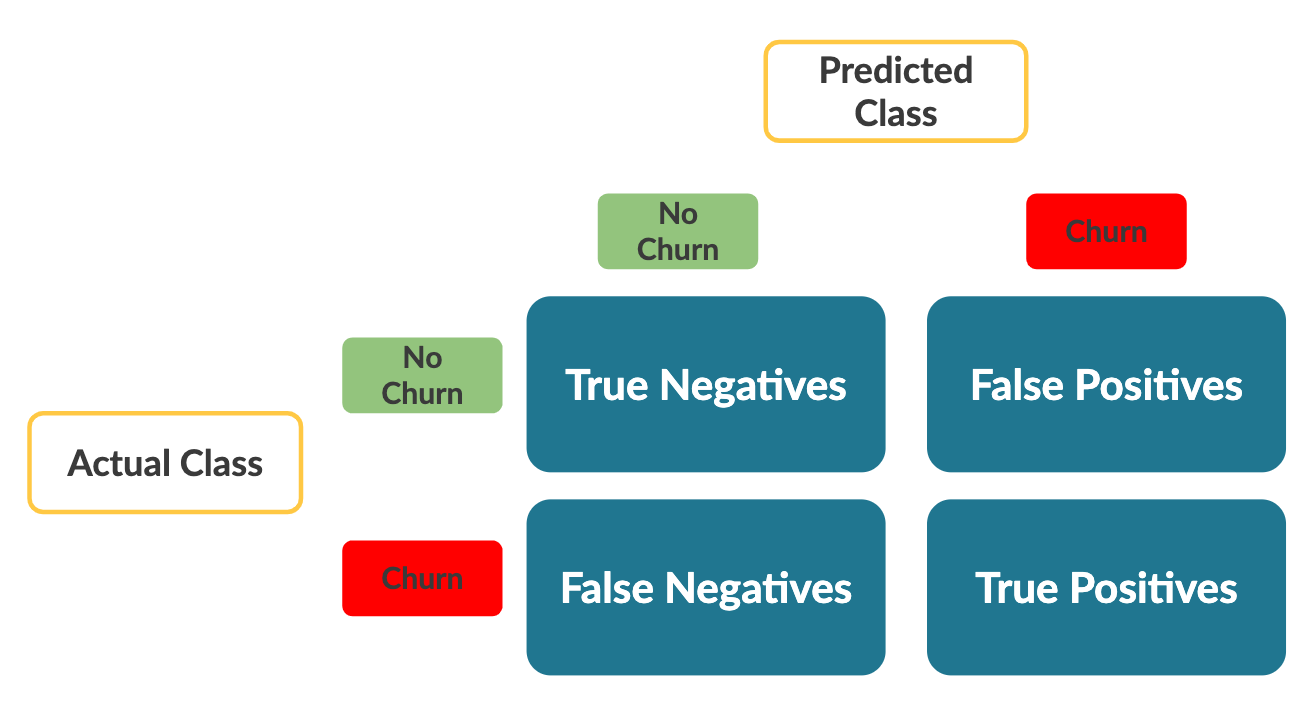

Notice that the axes are the opposite of what you saw above. The metrics themselves remain the same, but keep this in mind when interpreting the table.

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))



```
 [[842  13]
  [ 53  92]]
```


*  Your classifier made 842 + 92 = 934 correct predictions.

* The precision of your classifier is $100 \times \frac{92}{92+13}$ = 87.61%.

* The sensitivity, or recall, of your classifier is $100 \times \frac{92}{92+53}$ = 63.44%.

* There are 13 false positives in your classifier's predictions.

## ***Computing precision and recall***



In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))



`0.8292682926829268`

# **Probability thresholds**

* Every prediction has an associated probability thresholds
* Default probability threshold in scikit-learn: 50%
* What if we vary this threshold?

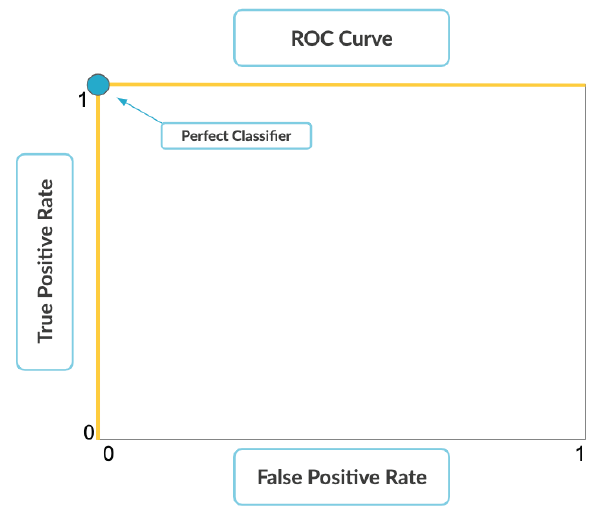

* ถ้าเดาได้ถูกหมด True positives = 1 False positives = 0 AUC = 1

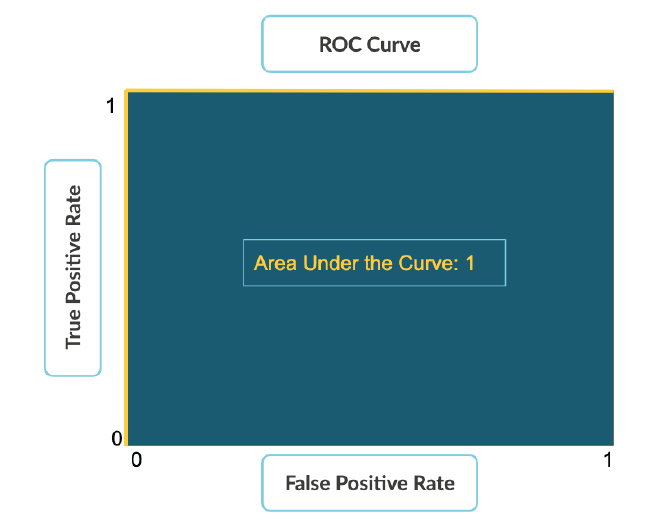

* ถ้าเดามั่ว AUC = 0.5

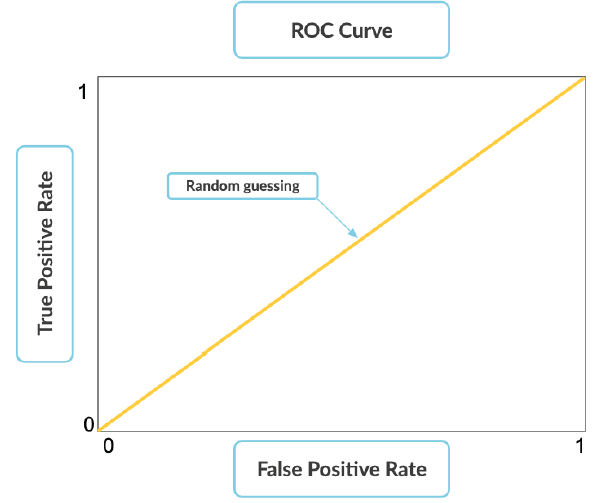

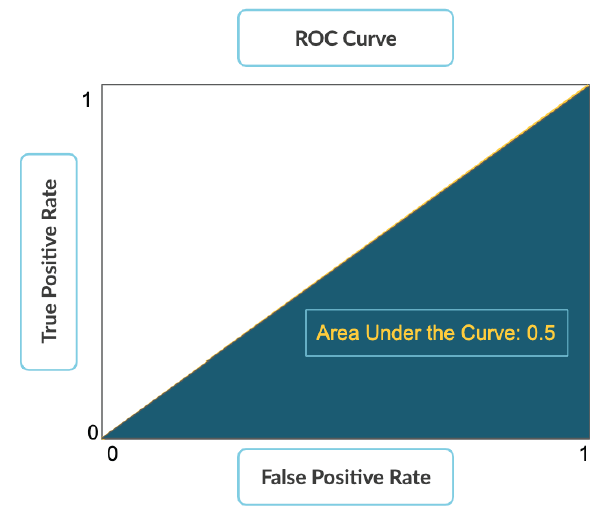

AUC = 0.7 ขึ้นไปคือโอเค

## **Generating probabilities in sklearn**

```
logreg.predict_proba(X_test)[:,1]


array([[0.80188981, 0.19811019],
       [0.96484075, 0.03515925],
       [0.9182671 , 0.0817329 ],
...,
```

* คอลัมน์ที่สองคือ churn prob

## ***ROC curve***


In [ ]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

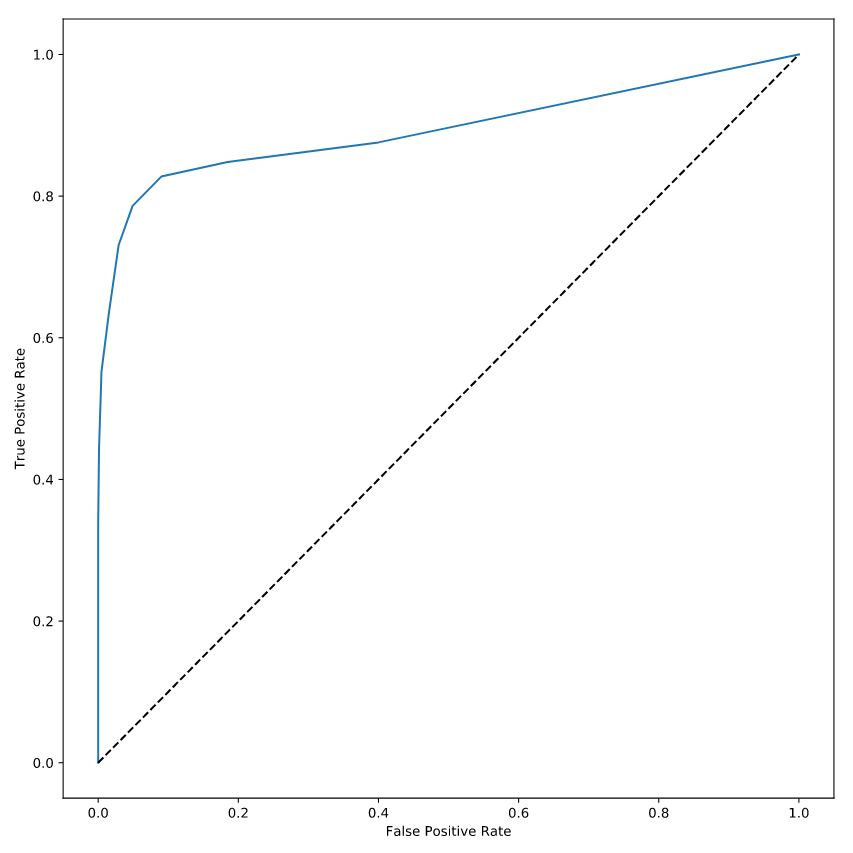

## ***Area under the curve***

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))



```
0.8938011695906432
```
## ***F1 score***

There's a tradeoff between **`precision`** and **`recall`**. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The **`AUC`** is one metric you can use in these cases, and another is the `F1 score`, which is calculated as below:

`2 * (precision * recall) / (precision + recall)`

The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. In scikit-learn, you can compute the f-1 score using using the **`f1_score`** function.


In [ ]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))



```
0.723404255319149
```



# **Grid Seearch**



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10, 51)}
clf_cv = GridSearchCV(RandomForestClassifier(), param_grid)
clf_cv.fit(X, y)
clf_cv.best_params_

## ***Tuning the number of features***

The default hyperparameters used by your models are not optimized for your data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance. In the video, you saw how the random forest's **`n_estimators`** hyperparameter was tuned. Here, you'll practice tuning the **`max_features`** hyperparameter.

```
Hyperparameter	Purpose
==============  ================================
max_features	  Number of features for best split
```
A random forest is an ensemble of many decision trees. The **`n_estimators`** hyperparameter controls *the number of trees to use in the forest*, while the **`max_features`** hyperparameter controls the number features the random forest should consider when looking for the best split at decision tree.

A random forest classifier has been instantiated for you as `clf`.

* Specify the hyperparameter grid by creating a dictionary with **`'max_features'`** as the *key* and a list consisting of `'auto'`, `'sqrt'`, `'log2'` as the value.

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)



```
{'max_features': 'log2'}
```

## ***Tuning other hyperparameters***

The power of **`GridSearchCV`** really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination. Here, you'll tune the following random forest hyperparameters:

```
Hyperparameter	     Purpose
==============       ==================================
criterion	           Quality of Split
max_features	       Number of features for best split
max_depth	           Max depth of tree
bootstrap	           Whether Bootstrap samples are used
```

The hyperparameter `grid` has been specified for you, along with a random forest classifier called `clf`.



In [ ]:
  # Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

## ***Randomized search***

Instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In scikit-learn, you can do this using **`RandomizedSearchCV`**. It has the same API as **`GridSearchCV`**, except that you need to specify a parameter distribution that it can sample from instead of specific hyperparameter values.

In [ ]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

## ***Visualizing feature importances***

Your random forest classifier from earlier exercises has been fit to the `telco` data and is available to you as `clf`. Let's visualize the feature importances and get a sense for what the drivers of churn are, using **`matplotlib`**'s **`barh`** to create a horizontal bar plot of feature importances.

* Calculate the feature importances of `clf`.
* Use **`plt.barh()`** to create a horizontal bar plot of importances.

In [ ]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

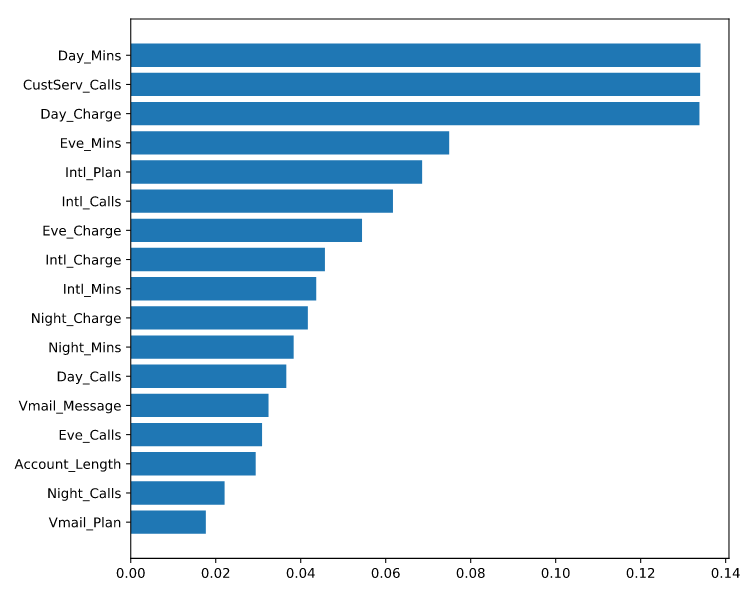